In [265]:
import pandas as pd
import numpy as np
import seaborn as sn
df = pd.read_csv('drugs.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [267]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [268]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [269]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [364]:
from sklearn.preprocessing import LabelEncoder

In [365]:
label = LabelEncoder()

In [398]:
#df["Sex_encode"] = LabelEncoder()

In [399]:
#df["Sex_ecode"]=label.fit_transform(df['Sex'])

In [400]:
df['Sex_encode'] = label.fit_transform(df['Sex'])
df['BP_encode'] = label.fit_transform(df['BP'])
df['Cholesterol_encode'] = label.fit_transform(df['Cholesterol'])

In [401]:
x = df[['Age','Sex_encode','Cholesterol_encode','Na_to_K']]

In [402]:
x.shape

(200, 4)

In [403]:
y = df.Drug

In [404]:
y.shape

(200,)

In [405]:
x.head()

,Age,Sex_encode,Cholesterol_encode,Na_to_K
0,23,0,0,25.355
1,47,1,0,13.093
2,47,1,0,10.114
3,28,0,0,7.798
4,61,0,0,18.043


In [406]:
y = df.Drug

In [407]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [408]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [409]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1, random_state=42)

In [417]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
#DecisionTreeClassifier
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [418]:
dtc.predict(x_train)

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugC', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugY', 'drugC', 'drugY', 'drugC',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY', 'drugC',
       'drugC', 'drugC', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugC', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'dru

In [419]:
dtc.predict([[20,0,1,1]])

array(['drugX'], dtype=object)

In [420]:
y_pred = dtc.predict(x_train)
y_pred

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugC', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugY', 'drugC', 'drugY', 'drugC',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY', 'drugC',
       'drugC', 'drugC', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugC', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'dru

In [421]:
import matplotlib.pyplot as plt

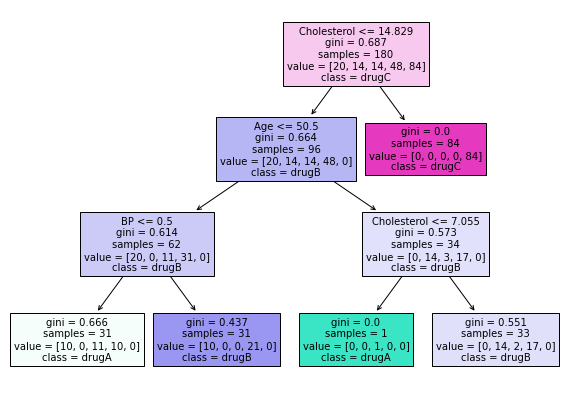

In [422]:
plt.figure(figsize=(10,7))
plot_tree(dtc,feature_names = ['Age','Sex','BP','Cholesterol','Na_to_K'], class_names=['drugX','drugY','drugA','drugB','drugC'],filled = True, fontsize=10)
plt.show()

In [382]:
from sklearn.metrics import classification_report, confusion_matrix

In [383]:
import numpy as np

In [384]:
y_train

124    drugB
16     drugX
148    drugX
93     drugY
65     drugY
       ...  
106    drugX
14     drugX
92     drugY
179    drugY
102    drugC
Name: Drug, Length: 180, dtype: object

In [385]:
y_test

95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
115    drugY
69     drugY
170    drugX
174    drugA
45     drugX
66     drugA
182    drugX
165    drugY
78     drugA
186    drugB
177    drugY
56     drugB
152    drugX
82     drugC
68     drugY
Name: Drug, dtype: object

In [386]:
print(x_train.ndim)

2


In [387]:
print(y_train.ndim)

1


In [388]:
y_test.shape

(20,)

In [389]:
dtc.predict(x_train)

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugC', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugY', 'drugC', 'drugY', 'drugC',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY', 'drugC',
       'drugC', 'drugC', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugC', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'dru

In [390]:
from sklearn.metrics import classification_report,confusion_matrix

In [391]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00        20
       drugB       0.00      0.00      0.00        14
       drugC       0.38      0.86      0.52        14
       drugX       0.59      0.79      0.68        48
       drugY       1.00      1.00      1.00        84

    accuracy                           0.74       180
   macro avg       0.39      0.53      0.44       180
weighted avg       0.65      0.74      0.69       180



C:\Users\Engr Asif Ali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [392]:
print(confusion_matrix(y_train,y_pred))

[[ 0  0 10 10  0]
 [ 0  0  0 14  0]
 [ 0  0 12  2  0]
 [ 0  0 10 38  0]
 [ 0  0  0  0 84]]


In [393]:
from sklearn.metrics import accuracy_score

In [394]:
print("Accuracy: ", dtc.score(x_test,y_test)*100)

Accuracy:  65.0
